In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
bert_latency_res = pd.read_csv('profile_res/latency_bert-base-uncased_res.csv')
gpt2_latency_res = pd.read_csv('profile_res/latency_gpt2_res.csv')
bart_latency_res = pd.read_csv('profile_res/latency_bart-base_res.csv')

bert_memory_res = pd.read_csv('profile_res/memory_bert-base-uncased_res.csv')
gpt2_memory_res = pd.read_csv('profile_res/memory_gpt2_res.csv')
bart_memory_res = pd.read_csv('profile_res/memory_bart-base_res.csv')

In [45]:
# Plot the average latency distribution of each layer
def plot_layer_profiling(
    profile_res: pd.DataFrame, 
    model_name: str, 
    save_file: str = None,
    color_map: dict = None,
    metric: str = 'inference latency',
    unit: str = 'seconds',
):
    if color_map is None:
        color_map = {
            'embedding_layer': 'blue',
            'transformer_layer': 'orange',
            'FC_layer': 'red'
        }
    # Assuming you have the DataFrame loaded as df
    averages = profile_res.mean()
    
    # Determine the color of each bar based on its label
    colors = [color_map['embedding_layer'] if 'embedding' in idx 
              else color_map['transformer_layer'] if 'transformer' in idx 
              else color_map['FC_layer'] if 'FC' in idx 
              else 'grey'  # default color 
              for idx in averages.index]

    # Plotting
    plt.figure(figsize=(15, 6))
    averages.plot(kind='bar', color=colors, width=0.5)
    # Also plot line graph
    plt.plot(averages, color='black', linestyle='-', linewidth=2)
    
    plt.ylabel(f'Average {metric} ({unit})', fontdict={'fontsize': 12})
    plt.xlabel('Layer', fontdict={'fontsize': 12})
    plt.title(f'Average {metric} per Layer for {model_name}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    if save_file:
        plt.savefig(save_file, bbox_inches='tight')
    plt.show()

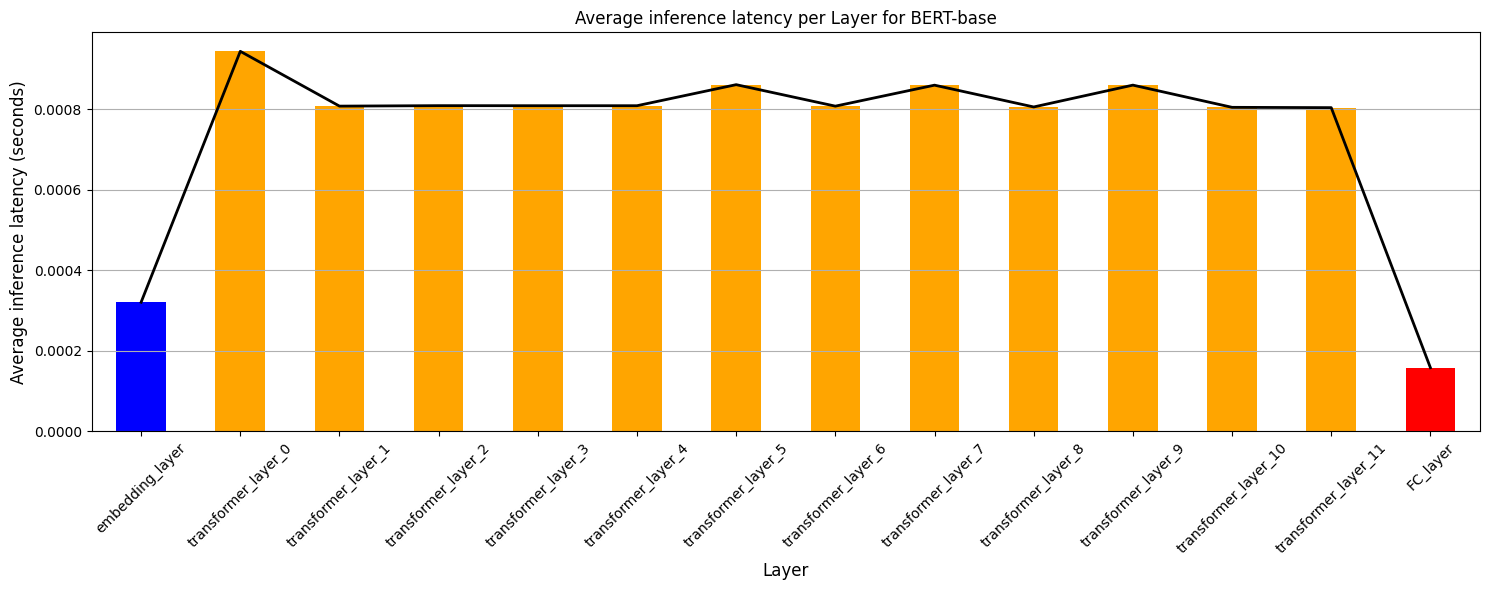

In [46]:
if not os.path.exists('figures'):
    os.makedirs('figures')

plot_layer_profiling(
    bert_latency_res, 
    'BERT-base', 
    save_file='figures/bert_layer_latency.pdf',
    metric='inference latency',
    unit='seconds',
)

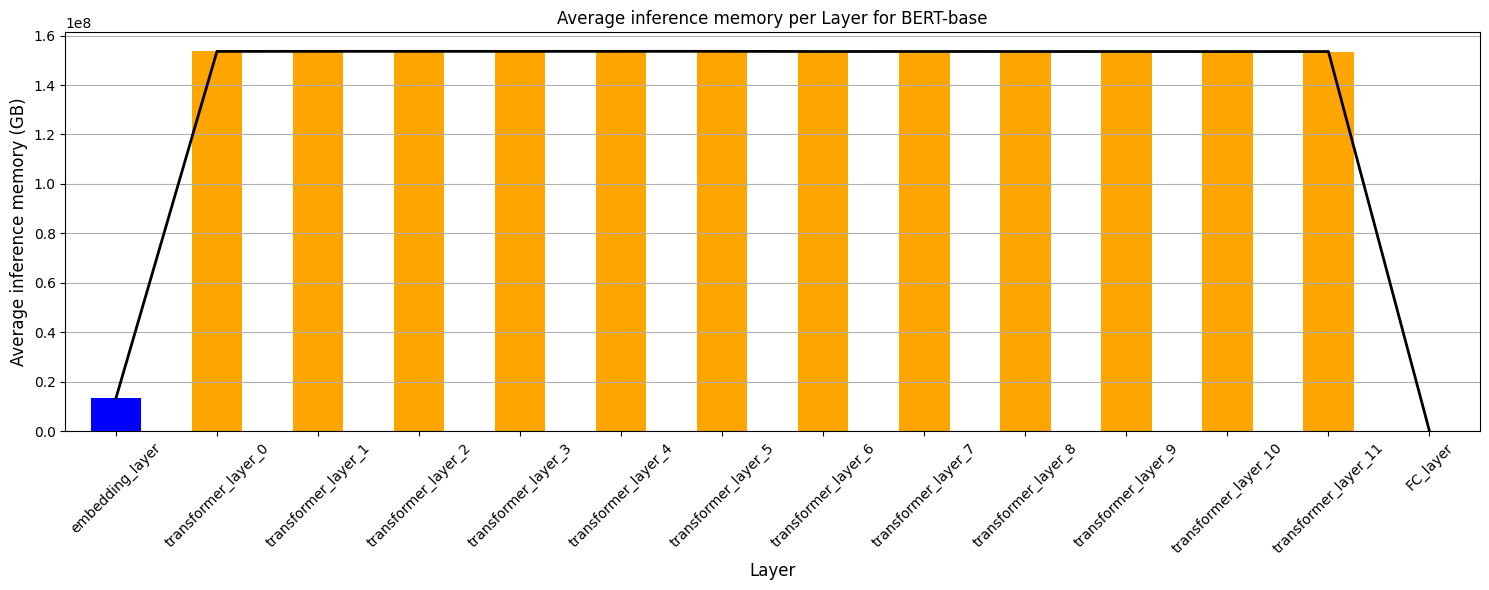

In [47]:
plot_layer_profiling(
    bert_memory_res, 
    'BERT-base', 
    save_file='figures/bert_layer_memory.pdf',
    metric='inference memory',
    unit='GB',
)

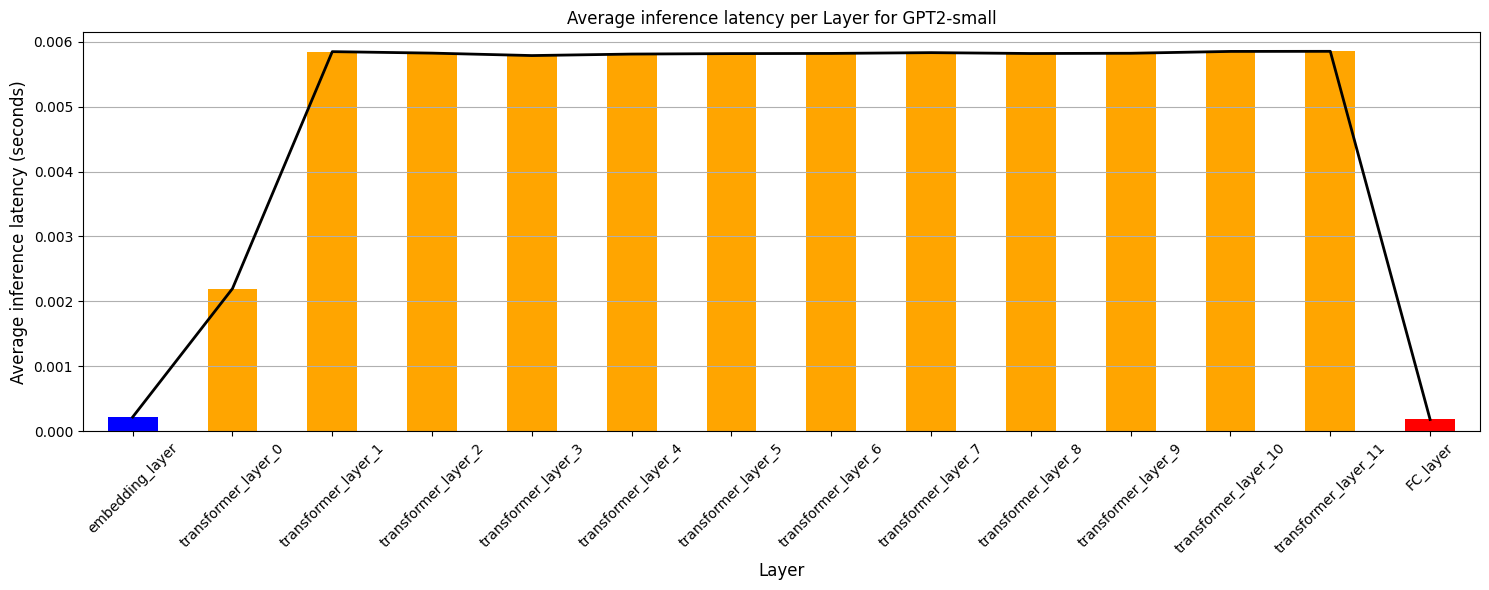

In [48]:
plot_layer_profiling(
    gpt2_latency_res, 
    'GPT2-small', 
    save_file='figures/gpt2_layer_latency.pdf',
    metric='inference latency',
    unit='seconds',
)

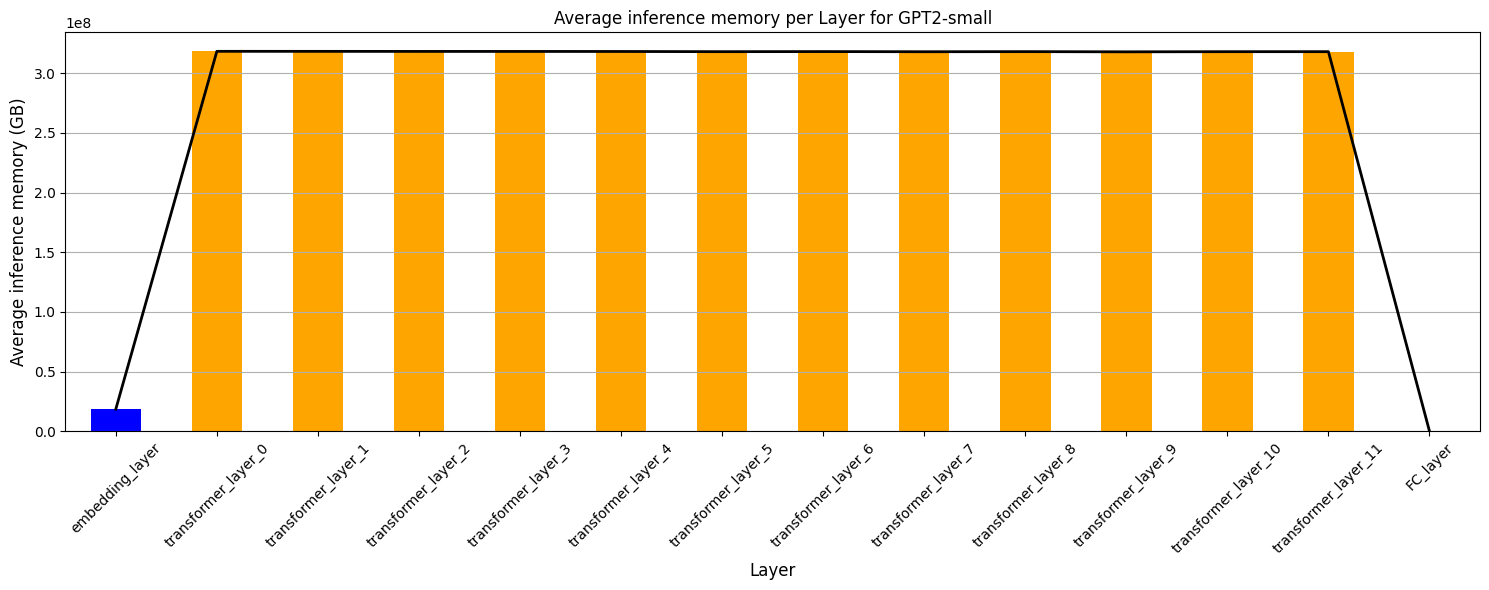

In [49]:
plot_layer_profiling(
    gpt2_memory_res, 
    'GPT2-small', 
    save_file='figures/gpt2_layer_memory.pdf',
    metric='inference memory',
    unit='GB',
)

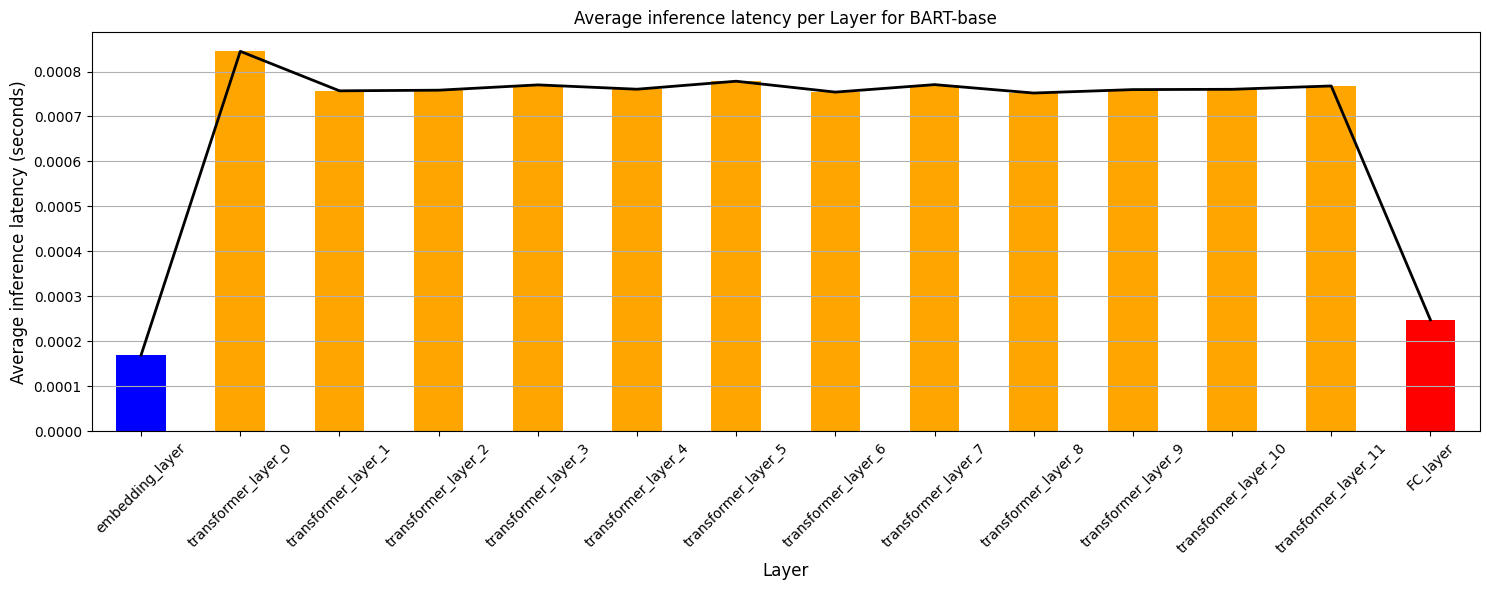

In [50]:
plot_layer_profiling(
    bart_latency_res, 
    'BART-base', 
    save_file='figures/bart_layer_latency.pdf',
    metric='inference latency',
    unit='seconds',
)

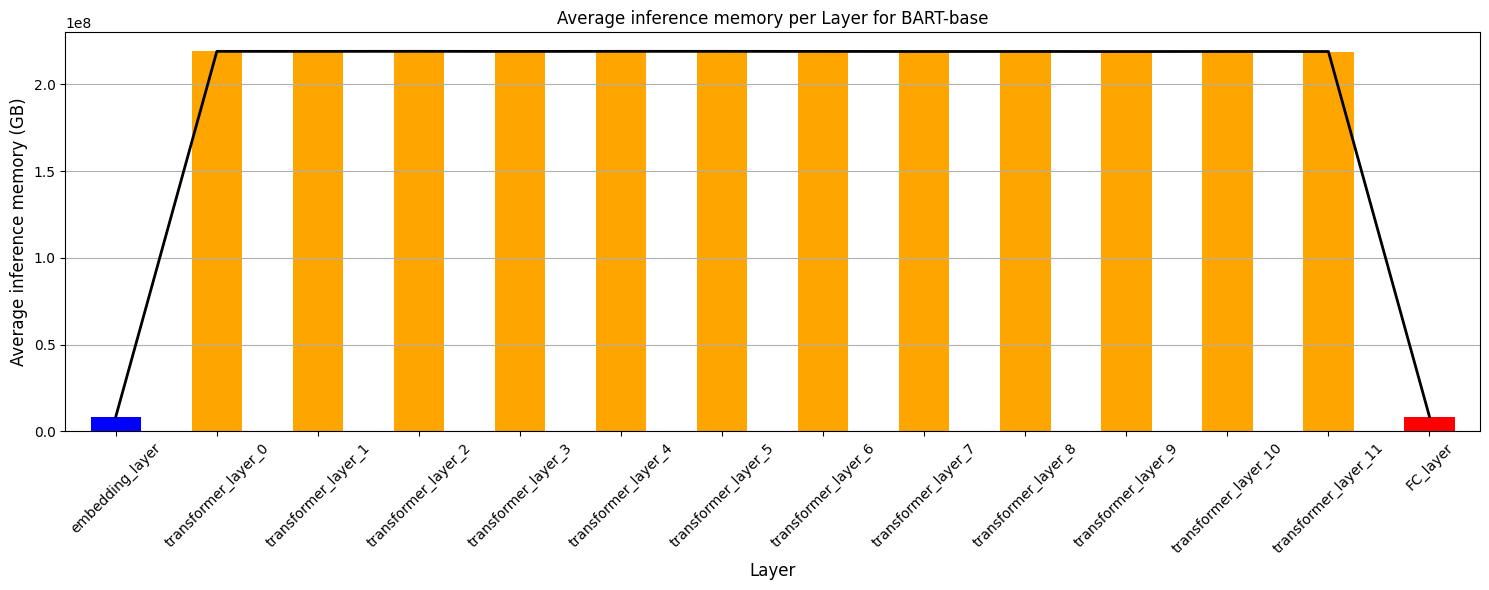

In [51]:
plot_layer_profiling(
    bart_memory_res, 
    'BART-base', 
    save_file='figures/bart_layer_memory.pdf',
    metric='inference memory',
    unit='GB',
)